# EDA
> Exploratory analysis of the results

In [1]:
#hide
import pandas as pd
from fastcore.xtras import Path

In [2]:
#hide
report_path = Path("../scripts/reports/nlp_script_accelerate/")

In [3]:
#hide
initial = report_path.ls()[0]; initial

Path('../scripts/reports/nlp_script_accelerate/multi_gpu_adjusted_bs')

In [4]:
#hide
columns = ["accelerator", "num_processes", "iteration", "learning_rate", "mixed_precision", "downcast", "train_batch_size", "validation_batch_size"]
for i in range(1,4):
    columns.append(f"epoch_{i}_accuracy")
    columns.append(f"epoch_{i}_f1")
    columns.append(f'epoch_{i}_train_time')
    columns.append(f'epoch_{i}_validation_time')
columns += ["total_time"]

In [5]:
#hide
df = pd.DataFrame(columns=columns)

In [6]:
#hide
def process_one(df, path):
    for i,file in enumerate(Path(path).ls()):
        if file.is_file():
            j = file.read_json()
            data = [j["training_device"], j["num_devices"], i, j["lr"], "mixed_precision" in file.parent.name, "downcast" in file.parent.name, j["train_batch_size"], j["eval_batch_size"]]
            mets = j["metrics"]
            speeds = j["speeds"]
            for i in range(3):
                data += [mets[i]["accuracy"], mets[i]["f1"]]
                data += [speeds["training"]["times"][i], speeds["evaluation"]["times"][i]]
            data += [speeds["total"]]
            df.loc[len(df.index)] = data
    return df

In [7]:
#hide
for folder in Path("../scripts/reports/nlp_script_accelerate").ls():
    if not folder.is_file():
        df = process_one(df, folder)

In [8]:
#hide
df.to_csv("../scripts/reports/nlp_script_accelerate/results.csv")

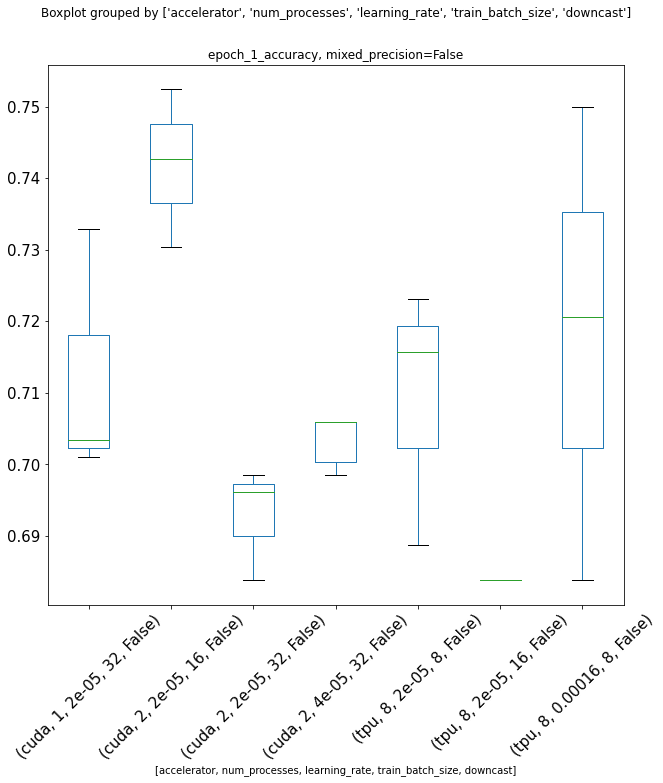

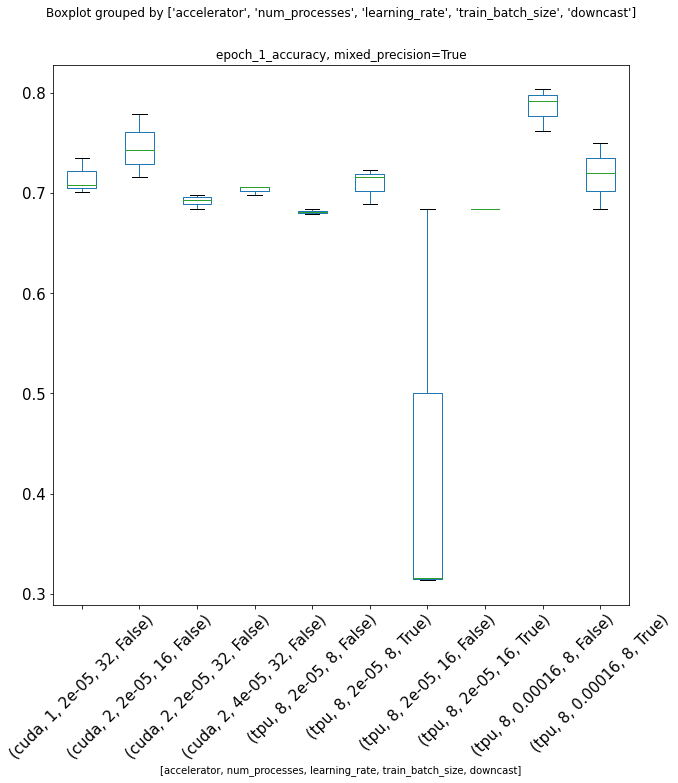

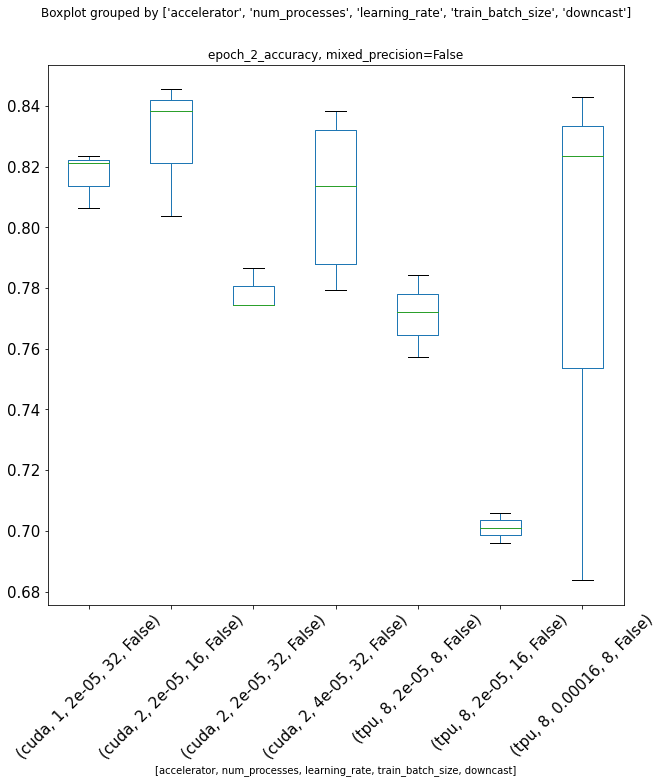

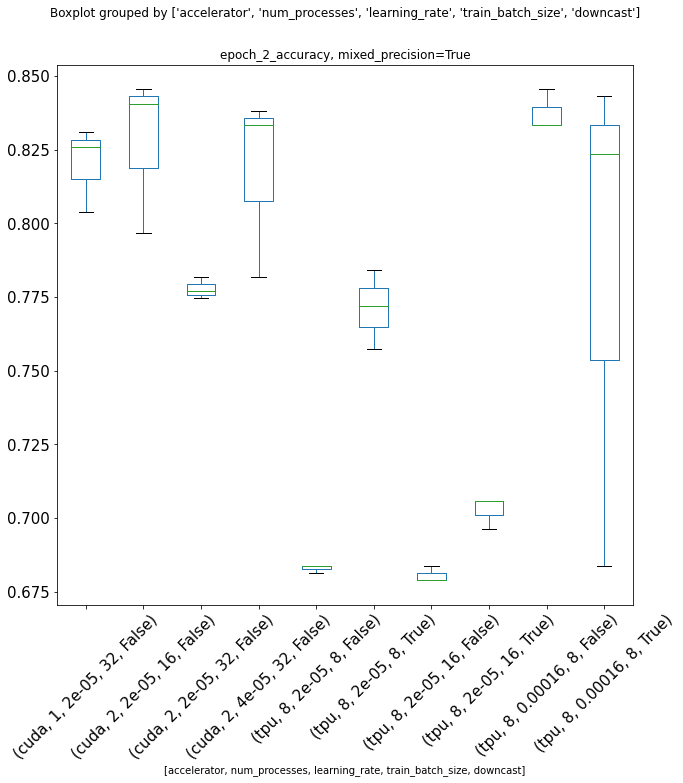

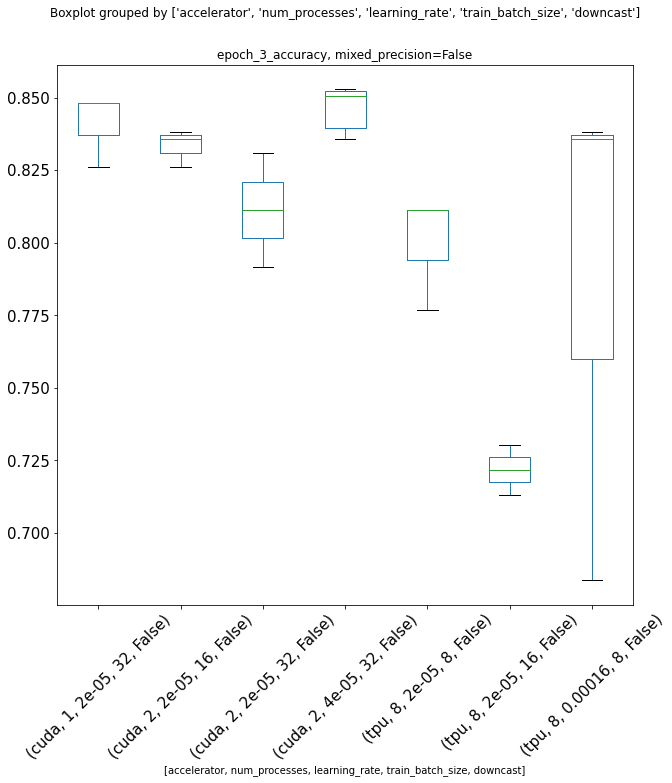

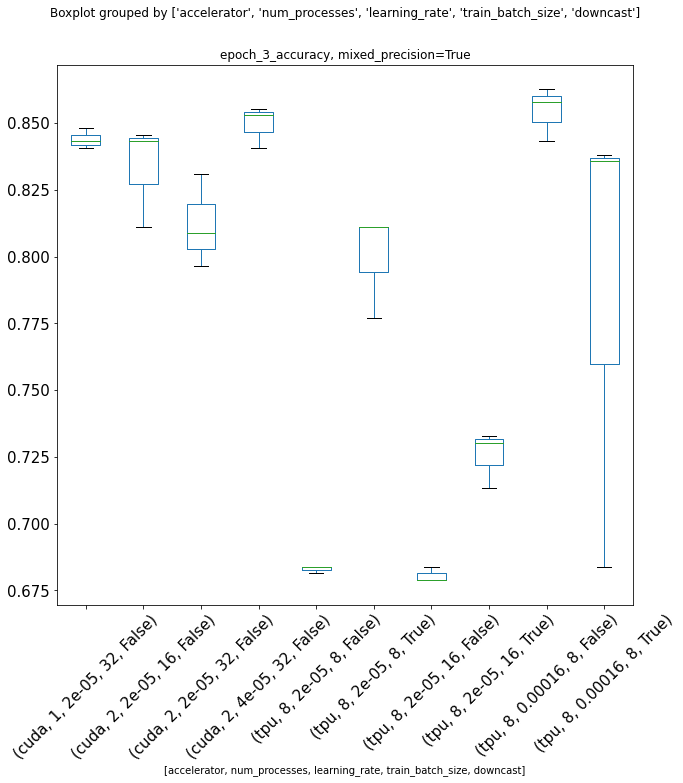

In [9]:
#hide_input
for i in range(1,4):
    for val in [False, True]:
        mask = df['mixed_precision'] == val
        bp = df[mask].boxplot(
            column=[f"epoch_{i}_accuracy"], 
            by=["accelerator","num_processes", "learning_rate", "train_batch_size", "downcast"],
            figsize=(10,10),
            grid=False,
            fontsize=15,
            rot=45
        )
        bp.get_figure().gca().set_title(f"epoch_{i}_accuracy, mixed_precision={val}");

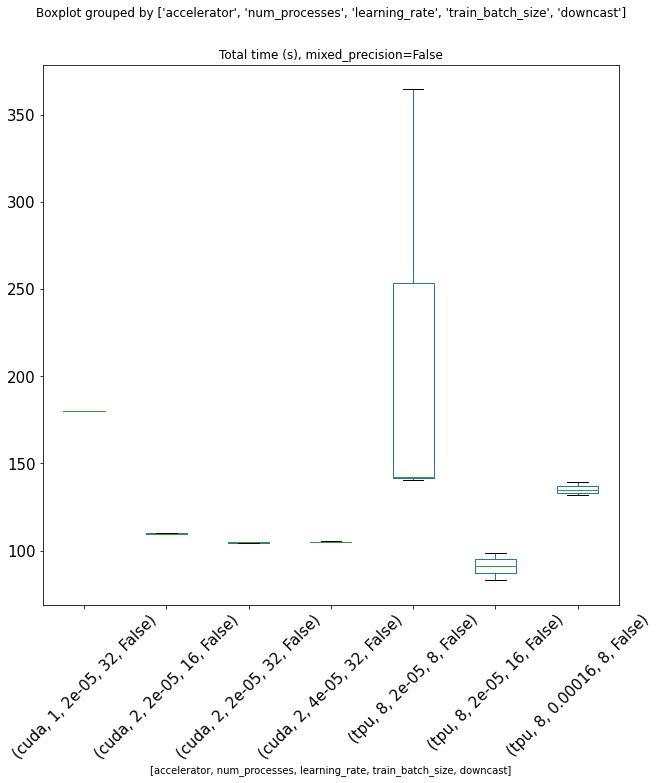

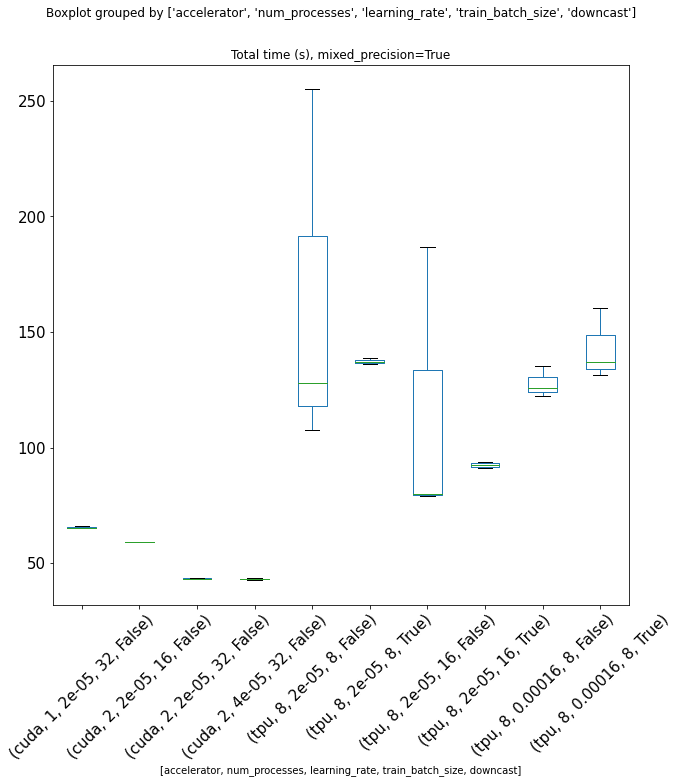

In [10]:
#hide_input
for val in [False, True]:
    mask = df['mixed_precision'] == val
    bp = df[mask].boxplot(
        column=["total_time"], 
        by=["accelerator","num_processes", "learning_rate", "train_batch_size", "downcast"],
        figsize=(10,10),
        grid=False,
        fontsize=15,
        rot=45
    )
    bp.get_figure().gca().set_title(f"Total time (s), mixed_precision={val}");

## TPU Baseline

In [11]:
#hide
report_path = Path("../scripts/reports/nlp_script/")

In [12]:
#hide
columns = ["accelerator", "num_processes", "iteration", "learning_rate", "mixed_precision", "downcast", "train_batch_size", "validation_batch_size"]
for i in range(1,4):
    columns.append(f"epoch_{i}_accuracy")
    columns.append(f"epoch_{i}_f1")
    columns.append(f'epoch_{i}_train_time')
    columns.append(f'epoch_{i}_validation_time')
columns += ["total_time"]

In [24]:
#hide
df = pd.DataFrame(columns=columns)

In [25]:
#hide
def process_one(df, path):
    for i,file in enumerate(Path(path).ls()):
        if file.is_file():
            j = file.read_json()
            data = [j["training_device"], j["num_devices"], i, j["lr"], "bf16" in file.parent.name, "downcast" in file.parent.name, j["train_batch_size"], j["eval_batch_size"]]
            mets = j["metrics"]
            speeds = j["speeds"]
            for i in range(3):
                data += [mets[i]["accuracy"], mets[i]["f1"]]
                data += [speeds["training"]["times"][i], speeds["evaluation"]["times"][i]]
            data += [speeds["total"]]
            df.loc[len(df.index)] = data
    return df

In [26]:
#hide
for folder in Path("../scripts/reports/nlp_script").ls():
    if not folder.is_file():
        df = process_one(df, folder)

In [27]:
#hide
df.to_csv("../scripts/reports/nlp_script/results.csv")

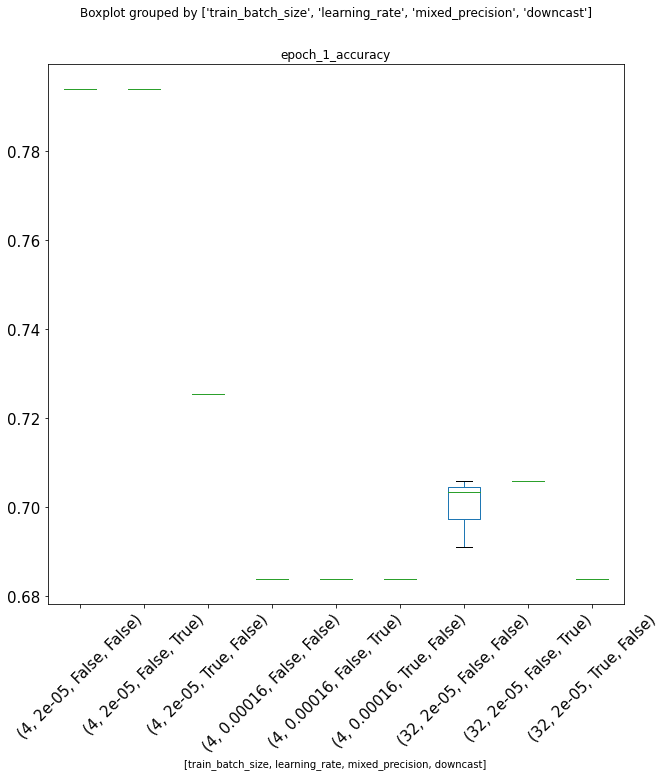

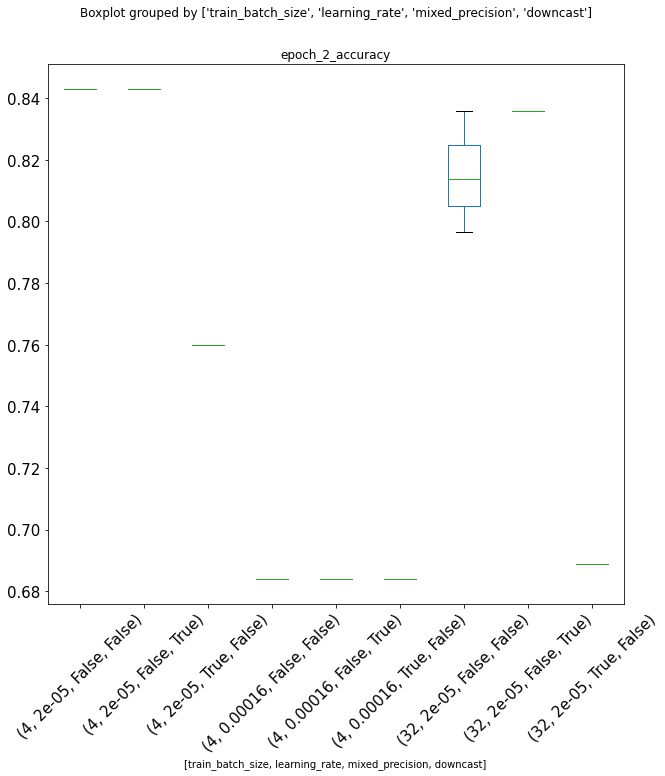

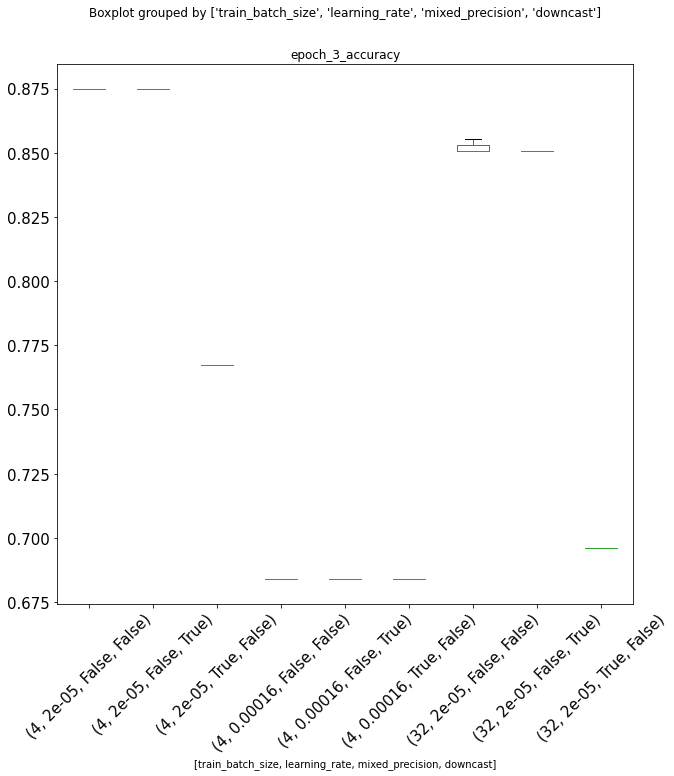

In [33]:
#hide_input
for i in range(1,4):
    bp = df.boxplot(
        column=[f"epoch_{i}_accuracy"], 
        by=["train_batch_size", "learning_rate", "mixed_precision", "downcast"],
        figsize=(10,10),
        grid=False,
        fontsize=15,
        rot=45
    )
    bp.get_figure().gca().set_title(f"epoch_{i}_accuracy");

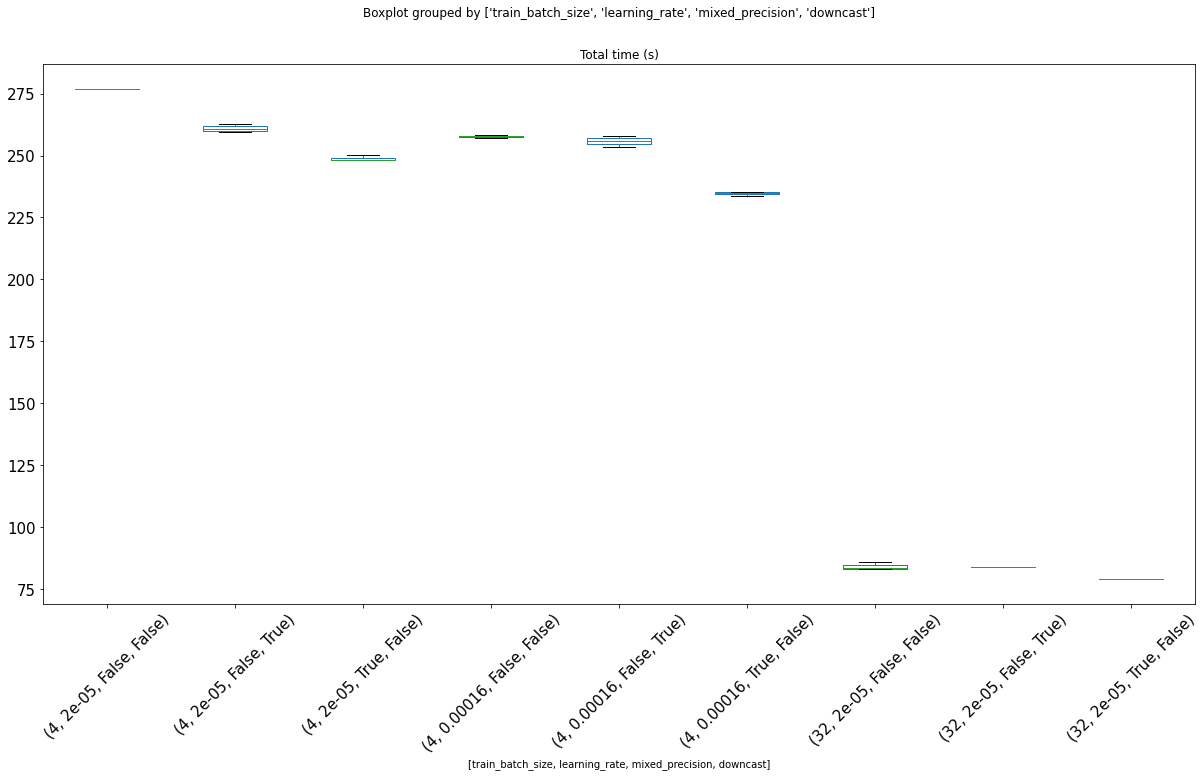

In [36]:
#hide_input
bp = df.boxplot(
    column=["total_time"], 
    by=["train_batch_size", "learning_rate", "mixed_precision", "downcast"],
    figsize=(20,10),
    grid=False,
    fontsize=15,
    rot=45
)
bp.get_figure().gca().set_title(f"Total time (s)");

## TPU Results from Accelerate

In [37]:
df = pd.read_csv("../scripts/reports/nlp_script_accelerate/results.csv")

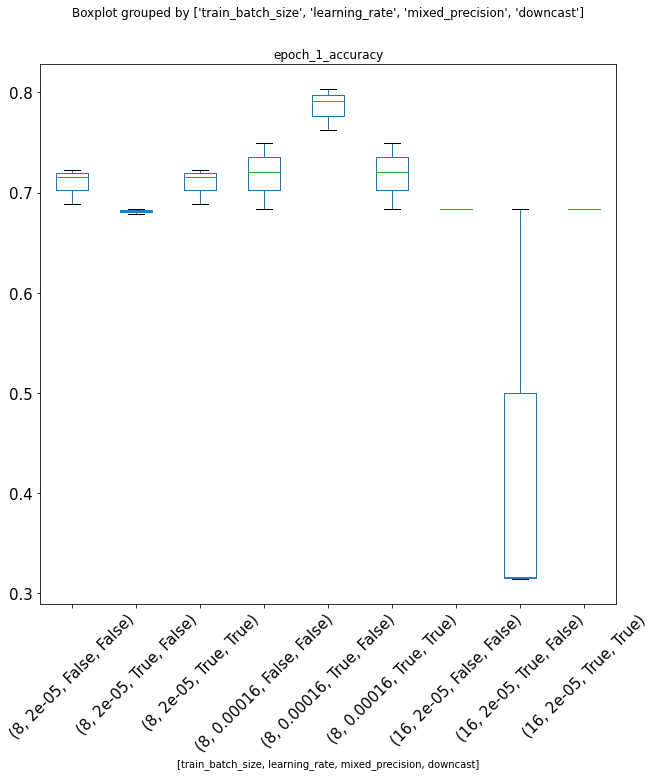

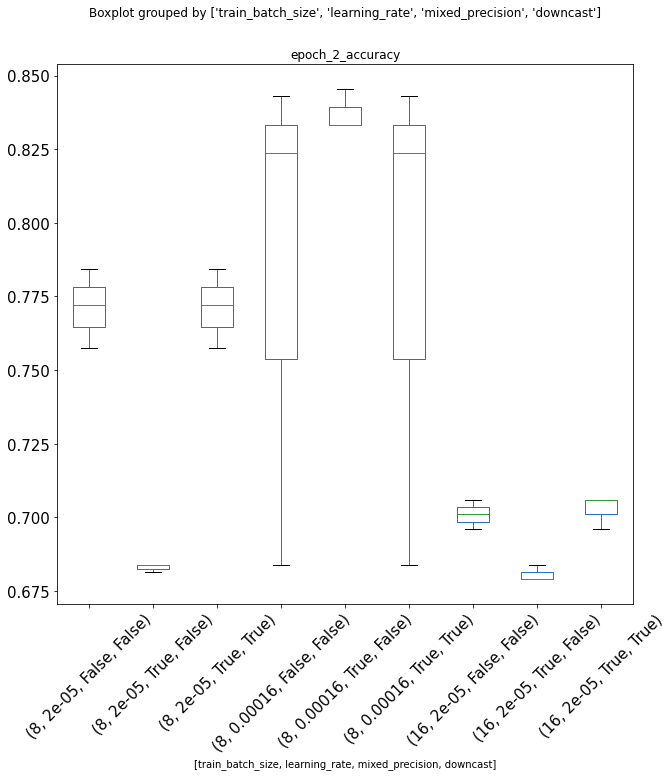

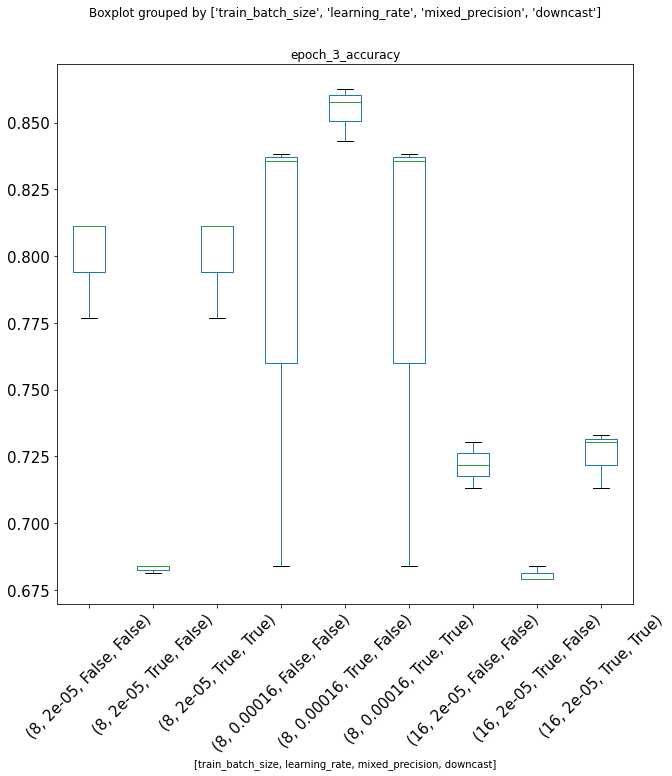

In [38]:
#hide_input
for i in range(1,4):
    bp = df[df["accelerator"] == "tpu"].boxplot(
        column=[f"epoch_{i}_accuracy"], 
        by=["train_batch_size", "learning_rate", "mixed_precision", "downcast"],
        figsize=(10,10),
        grid=False,
        fontsize=15,
        rot=45
    )
    bp.get_figure().gca().set_title(f"epoch_{i}_accuracy");

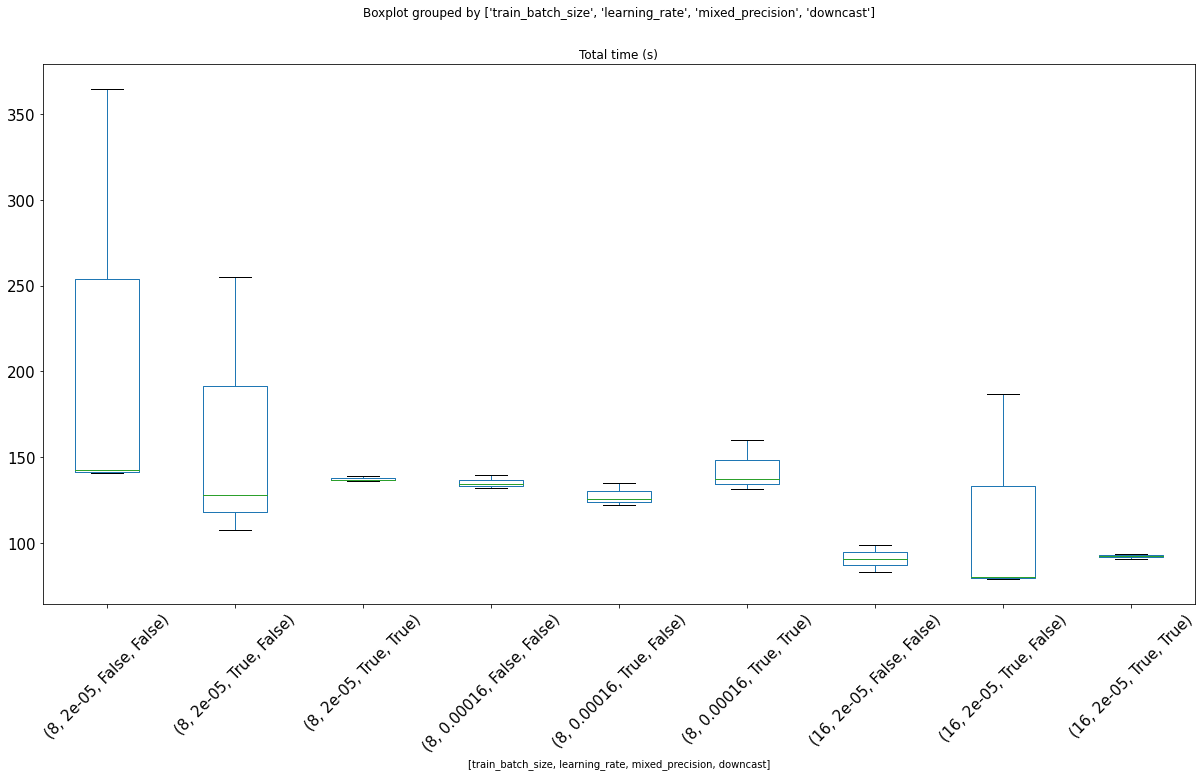

In [39]:
#hide_input
bp = df[df["accelerator"] == "tpu"].boxplot(
    column=["total_time"], 
    by=["train_batch_size", "learning_rate", "mixed_precision", "downcast"],
    figsize=(20,10),
    grid=False,
    fontsize=15,
    rot=45
)
bp.get_figure().gca().set_title(f"Total time (s)");